In [43]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.linalg import norm, det, eig, solve, matrix_rank

# Матрицы

## 1. Базовая информация
Матрицы в общем случае это опрераторы, которые переводят элемент из пространства одной размерности в пространство другой размерности, например матрица $A (m\times n)$ переводит элемент $x(n, 1)$ в элемент $y(m, 1)$: $A(m, n) \times x(n, 1) = y(m, 1)$.

Для создания матриц в `python` сужествуют несколько вариантов:
1. Нулевая матрица: `np.zeros((3, 4))`
2. Единичная матрица: `np.ones((3, 4))`
3. Квадратная диагональная единичная матрица: `np.eye(3, dtype=float)`
4. Матрица с произвольными значениями: `np.array([[1, 2, 3], [4, 5, 6]])`

In [2]:
# как дополнительный пример создания матрицы
np.arange(1, 7, 1).reshape((2, 3))

array([[1, 2, 3],
       [4, 5, 6]])

## 2. Основные типы матриц

**Диагональная матрица**: это матрица, у которой все элементы кроме тех что на диагонали равны 0.

Диагональная матрица задает соответственно растяжение-сжатие фигуры до преобразования вдоль соответствующих осей на значение элемента на диагонали.

<img src='img/matrix_ortogonal.png'/>

**Ортогональная матрица**: это матрица, для которой выполено условие: $AA^{T}=A^{T}A=I$.

Из определения сразу вытекает ряд свойств:
1. Ортогональная матрица обратима, причем $A^{-1}=A$
2. Орторональная матрица сохраняет скалярное произведение:
$$
    (Ax, Ay) = (Ax)^{T} (Ay)=x^{T}A^{T}Ay=x^{T}y=(x,y)
$$
3. Ортогональная матрица сохраняет длины векторов, так как сохраняется и скалярное произведение.

Ортогональная матрица задает соответственно вращение фигуры.

<img src='img/matrix_diagonal.png'/>

**Симметричная матрица**: матрица в  которой все элементы симметричны относительно главной диагонали.

**Теорема**: Любую симметричную матрицу $A$ можно представить в виде $A=Q\times D \times Q^{T}$, где $Q$ - ортогональная матрица, а $D$ - диагональная матрица.

Поэтому, симметричная матрица задает растяжение (как диагональная матрица) и поворот (как ортогональная матрица).

<img src='img/matrix_symmetrical.png'/>

## 3. Определитель матрицы и ранг

Очень выжным понятием для матрицы является определеитель

**Опр**: Определитель матрицы это выражение, которое для квадратной матрицы $A(2, 2)$ принимает вид (ограничимся только таким определением) (вычисляется с использованием `numpy.linalg.det`):

$$
    det A = a_{11}a_{22} - a_{12}a_{21}
$$

**Смысл определителя**: показывает объем $N$-метроно паралепипида, заданного матрицей $A$, те. $S = |det A|$.

Таким образом, определитель матрицы $A$ показывает как *количественно изменится площадь фигуры после преобразования этой фигуры при помощи выбранной матрицы $A$*.

Например, при преобразовании единичного квадрата, построенного на векторах `x=[0, 1].T` и `y=[1, 0].T` с помощью матрицы `A = [[1, 2], [3, 1]]` получим параллелограмм с площадью $S=5$, что говорит о том, что площадь единичного квадрата увеличилась в 5 раз. 
Докажем что это верно ниже:

In [3]:
x = np.array([0, 1, 1, 0]).reshape((2, 2))
A = np.array([1, 2, 3, 1]).reshape((2, 2))

y = A.dot(x)
angle =  np.arccos(np.dot(y[0, :], y[1, :]) / norm(y[0, :], ord=2) / norm(y[1, :], ord=2))
S_real = norm(y[0, :], ord=2) * norm(y[1, :], ord=2) * np.sin(angle)
S_det = np.abs(det(A))

print(r'Площадь после преобразования через школьную формулу: {0}'.format(round(S_real, 3)))
print(r'Площадь после преобразования через школьную формулу: {0}'.format(round(S_det, 3)))

Площадь после преобразования через школьную формулу: 5.0
Площадь после преобразования через школьную формулу: 5.0


**Некоторые свойства определителя**:
1. Определитель матрицы, содержащей линейно зависимые строки равен нулю. (в друхмерном пространстве это два вектора, лежащих на одной прямой - ясно что площадь такого параллелограмма будет равна нулю).

In [4]:
A = np.array([[1, 2, 3], [2, 5, 1], [2, 4, 6]]).reshape((3, 3))
# print('матрица A:\n {0}'.format(A))
print('Определитель матрицы A с двумя линейно зависимыми векторами: {0}'.format(det(A)))

Определитель матрицы A с двумя линейно зависимыми векторами: 0.0


2. Определитель матрицы не меняется при транспонировании, те. `det A = det A.T`

In [5]:
A = np.array([[1, 2, 3], [2, 5, 1], [1, 4, 3]]).reshape((3, 3))
# print('матрица A:\n {0}'.format(A))
print('Определитель матрицы A   : {0}'.format(round(det(A), 3)))
print('Определитель матрицы A.T : {0}'.format(round(det(A.T), 3)))

Определитель матрицы A   : 10.0
Определитель матрицы A.T : 10.0


3. Если $A$ и $B$ квадратные матрицы одного размера, то $det(A\times B) = det(a)\times det(B)$.

In [6]:
A = np.array([[1, 2, 3], [2, 5, 1], [1, 4, 3]]).reshape((3, 3))
B = np.array([[1, 5, 3], [2, 1, 1], [1, 2, 3]]).reshape((3, 3))

print('det(AB)       = {0}'.format(round(det(A.dot(B)), 3)))
print('det(A)*det(B) = {0}'.format(round(det(A)*det(B), 3)))

det(AB)       = -150.0
det(A)*det(B) = -150.0


Важным параметром, харрактеризующим количество инфорации в матрице является ее ранг.

**Опр.** Рангом матрицы $A$ называется максимально возможное число ЛН строк или стобцов (есть теорема что число ЛН строк равное числу ЛН столбцов).

В `python` вычисление ранга матрицы происходит при помощи `numpy.linalg.matrix_rank`.


## 4. Собственные вектора и значения

Важной харрактеристикой матрицы, или же преобразования, задаваемого ее матрицей являются - Собственные Вектора (`СВ`) и Собственные Значения (`СЗ`). Они будут использоваться нами далее в Методе Главных Компонент при отборе значимых признаков (уменьшение размерности данных с минимальной потерей информации).

**Опр.** СВ матрица $A$ будем называть, вектора $x$, удовлетворяющие $Ax = \lambda x$, где $\lambda$ некоторое действительное число.

Из определения видно, что при действии оператора $A$ на СВ $x$ **не происходит изменение направления вектора**, только его растяжение или сжатие.
Это и является особенной харрактеристикой СВ. 

Рассмотрим это на примере (*аналитическое решение в img*):

In [25]:
A = np.array([-4, 6, -3, 5]).reshape((2, 2))
eig_vals, eig_vec = eig(A)

print('СЗ: {0}'.format(eig_vals))
print('CB:\n {0}'.format(eig_vec))

СЗ: [-1.  2.]
CB:
 [[-0.89442719 -0.70710678]
 [-0.4472136  -0.70710678]]


Построим для данной матрицы:
1. `СВ` и применим к нему преобразование $A$
2. `не СВ` и применим к нему преобразование $A$

Изучим их взаимное положение на рисунке ниже:

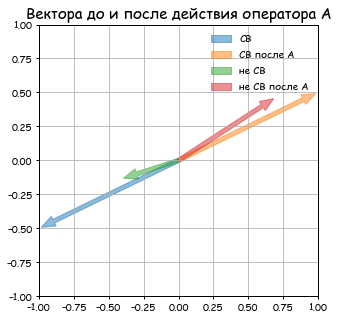

In [30]:
%run ./plot.py eigen

Как видно из рисунка, `СВ` не поменял направление, в то время как `не СВ` координального его изменил.

Не у каждой матрицы существую собственные вектора, например у ортогональной матрицы поворота (что логично, так как она задает число вращение). *Замечание: есть только для углов $0, \pi$*

В примере ниже для угла $\pi/3$ мы видем что собственные значения комплексные - значит решить задачу не удалось.

In [37]:
alpha = np.pi/3.

A = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha), np.cos(alpha)]
])

eig_val, eig_vec = eig(A)

print('СЗ: {0}'.format(eig_val))

СЗ: [0.5+0.8660254j 0.5-0.8660254j]


## Системы линейных уравнений



Системы линейных уравнений записываются в общем виде как: $Ax=b$, где $x, b$ - векторы, $A$ - некоторая матрица.

Система линейных уравнений может иметь:
1. Одно решение
2. Бесконечно много решений
3. Не иметь решений - такая система называется несовместной

**Теорема Кронкера-Каппели**: Система линейных уравнений $Ax=b$ совместна, если ранг оснонвной матрицы $A$ равен рангу расширенной матрицы $(A|b)$. Причем система имеет единственное решение если ранг матрицы равен числу неизвестных и имеет бесконечно много решений, если ранг меньше числа неизвестных.

Системы линейных уравений решаются в `python` при помощи `numpy.linalg.solve`.

Пример системы, которая не имеет решений:

In [45]:
A = np.ones((2, 2))
b = np.array([1, -1])
# Create extended matrix 
A_b = np.zeros((2, 3))
A_b[:, :-1] = A
A_b[:, -1] = b

try:
    x = solve(A, b)
except Exception as e:
    print('rank A = {0}'.format(matrix_rank(A)))
    print('rank (A|b) = {0}'.format(matrix_rank(A_b)))
    print('Error: {0}'.format(str(e)))

rank A = 1
rank (A|b) = 2
Error: Singular matrix


Пример системы, которая имеет одно решение:

In [46]:
A = np.array([1, 2, 1, 1]).reshape((2, 2))
b = np.array([5, 3])
# Create extended matrix 
A_b = np.zeros((2, 3))
A_b[:, :-1] = A
A_b[:, -1] = b

try:
    x = solve(A, b)
    print('rank A = {0}'.format(matrix_rank(A)))
    print('rank (A|b) = {0}'.format(matrix_rank(A_b)))
    print('x = {0}'.format(x))
except Exception as e:
    print('Error: {0}'.format(str(e)))

rank A = 2
rank (A|b) = 2
x = [1. 2.]


Пример системы, которая имеет бесконечно много решений:

In [52]:
A = np.array([1, 1, 2, 2]).reshape((2, 2))
b = np.array([2, 4])
# Create extended matrix 
A_b = np.zeros((2, 3))
A_b[:, :-1] = A
A_b[:, -1] = b

try:
    x = solve(A, b)
except Exception as e:
    print('rank A = {0}'.format(matrix_rank(A)))
    print('rank (A|b) = {0}'.format(matrix_rank(A_b)))
    print('Error: {0}'.format(str(e)))

rank A = 1
rank (A|b) = 1
Error: Singular matrix
